### Impute empty values to mean 

In [2]:
# Solution:

# In this dataset we have lots of observations that have missing values
# Missing values are represented using 0s
# We need to impute values with mean of every feature and substitute for missing values

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Diabetes Dataset

Input Features: 'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age'

Target Feature: 'diabetes_class'

Objective: Predict diabetes_class for given input features


In [6]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [125]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [9]:
# Find all the columns that have NA
df.isna().any(axis=0)

preg_count                     False
glucose_concentration          False
diastolic_bp                   False
triceps_skin_fold_thickness    False
two_hr_serum_insulin           False
bmi                            False
diabetes_pedi                  False
age                            False
diabetes_class                 False
dtype: bool

In [10]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
# finding columns with empty values 

columns_empty_values = []

for col in columns:
    #print(col)
    cnt = df[df[col]==0][col].count()
    if(cnt>0 and col!='diabetes_class'):
        columns_empty_values.append(col)
        print("{0}: {1}".format(col,cnt))

preg_count: 111
glucose_concentration: 5
diastolic_bp: 35
triceps_skin_fold_thickness: 227
two_hr_serum_insulin: 374
bmi: 11


In [41]:
# Columns those can be imputed with mean values

columns_empty_values

['preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi']

In [42]:
df

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


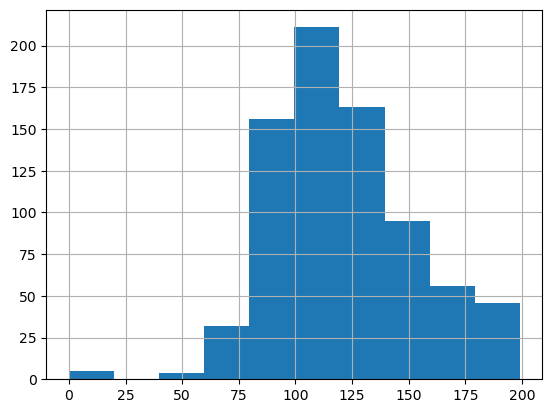

In [43]:
df['glucose_concentration'].hist()
plt.show()

In [45]:
# Find Summary statistics for each class
# impute values based on class
group_class = df.groupby('diabetes_class')

In [46]:
group_class.head(2)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [49]:
# Attribute Mean value is different for each_group
group_class.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [84]:
(sum(df[df['diabetes_class']==0]['glucose_concentration']))/ \
df[df['diabetes_class']==0]['glucose_concentration'].shape[0]

109.98

In [104]:
(sum(df[(df['diabetes_class']==0) & (df['glucose_concentration'])!=0]['glucose_concentration']))/ \
(df[(df['diabetes_class']==0) & (df['glucose_concentration']!=0)]['glucose_concentration'].shape[0])

57.92354124748491

In [105]:
(sum(df[(df['diabetes_class']==0) & (df['glucose_concentration'])!=0]['glucose_concentration']))/ \
(df[(df['diabetes_class']==0) & (df['glucose_concentration'])!=0]['glucose_concentration'].shape[0])

111.5813953488372

In [107]:
(sum(df[(df['diabetes_class']==1) & (df['glucose_concentration'])!=0]['glucose_concentration']))/ \
(df[(df['diabetes_class']==1) & (df['glucose_concentration'])!=0]['glucose_concentration'].shape[0])

143.10852713178295

In [108]:
# imputing 0 to NA to check correct Mean values

columns_empty_values

['preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi']

In [137]:
df2 = df.copy()

In [138]:
df2[columns_empty_values] = df2[columns_empty_values].replace({'0':np.nan, 0:np.nan})

In [139]:
df2

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [140]:
group_class2 = df2.groupby('diabetes_class')

In [141]:
group_class2.head(2)

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0


In [142]:
group_class2.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,3.861827,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000
1,5.669565,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164


In [143]:
group_class.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [144]:
df2['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [157]:
# Hence new dataframe df2 is having more accurate mean after replacing 0 with Nan we will use new data

del df

In [145]:
# only following features will be updated with mean values
columns_empty_values

['preg_count',
 'glucose_concentration',
 'diastolic_bp',
 'triceps_skin_fold_thickness',
 'two_hr_serum_insulin',
 'bmi']

In [146]:
# for each group use group level averages

df2['preg_count'] = group_class2['preg_count'].transform(lambda x: x.replace(np.NaN,x.mean().round()))
df2['glucose_concentration'] = group_class2['glucose_concentration'].transform(lambda x: x.replace(np.NaN,x.mean().round()))
df2['diastolic_bp'] = group_class2['diastolic_bp'].transform(lambda x: x.replace(np.NaN,x.mean().round()))
df2['triceps_skin_fold_thickness'] = group_class2['triceps_skin_fold_thickness'].transform(lambda x: x.replace(np.NaN,x.mean().round()))
df2['two_hr_serum_insulin'] = group_class2['two_hr_serum_insulin'].transform(lambda x: x.replace(np.NaN,x.mean().round()))
df2['bmi'] = group_class2['bmi'].transform(lambda x: x.replace(np.NaN,x.mean().round()))

In [147]:
df2.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6.0,148.0,72.0,35.0,207.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,130.0,26.6,0.351,31,0
2,8.0,183.0,64.0,33.0,207.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,6.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [149]:
# separate diabetic and normal samples

diabetic = df2['diabetes_class'] == 1
normal = df2['diabetes_class'] == 0

In [150]:
diabetic

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: diabetes_class, Length: 768, dtype: bool

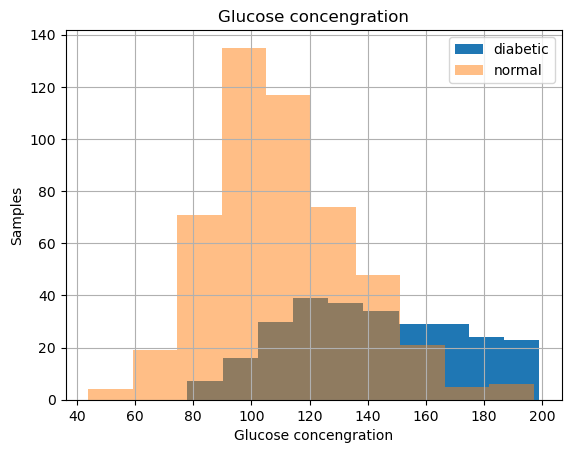

In [154]:
# Glucose concentration histogram

plt.hist(df2[diabetic]['glucose_concentration'],label='diabetic')
plt.hist(df2[normal]['glucose_concentration'],label='normal',alpha=0.5)
plt.grid()
plt.title('Glucose concengration')
plt.xlabel('Glucose concengration')
plt.ylabel('Samples')
plt.legend()
plt.show()


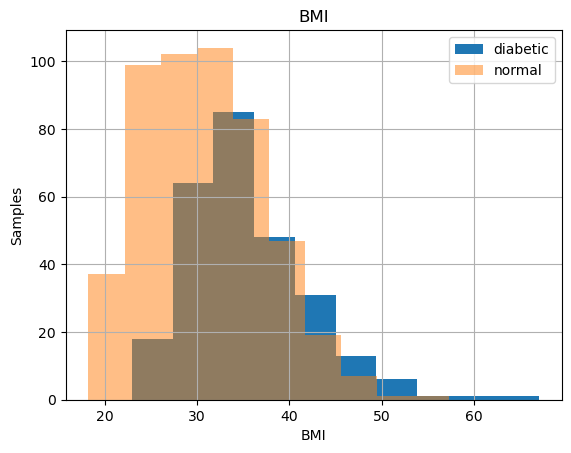

In [153]:
# BMI concentration histogram

plt.hist(df2[diabetic]['bmi'],label='diabetic')
plt.hist(df2[normal]['bmi'],label='normal',alpha=0.5)
plt.grid()
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

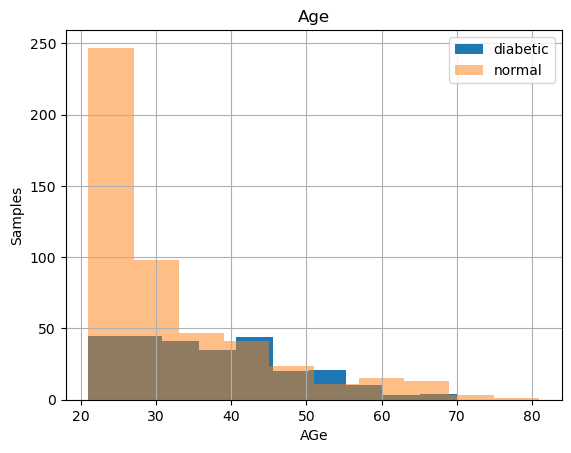

In [156]:
# Age concentration histogram

plt.hist(df2[diabetic]['age'],label='diabetic')
plt.hist(df2[normal]['age'],label='normal',alpha=0.5)
plt.grid()
plt.title('Age')
plt.xlabel('AGe')
plt.ylabel('Samples')
plt.legend()
plt.show()

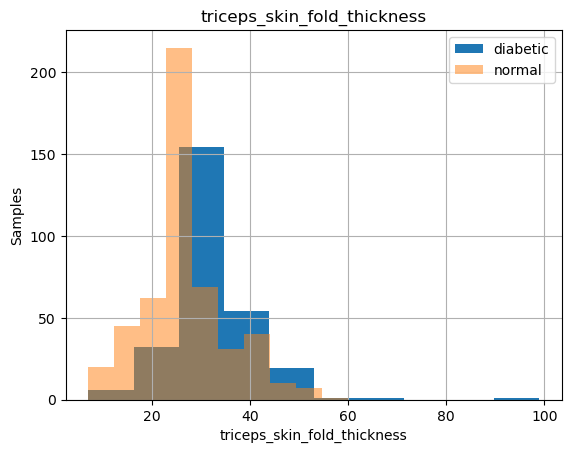

In [155]:
# triceps_skin_fold_thickness concentration histogram

plt.hist(df2[diabetic]['triceps_skin_fold_thickness'],label='diabetic')
plt.hist(df2[normal]['triceps_skin_fold_thickness'],label='normal',alpha=0.5)
plt.grid()
plt.title('triceps_skin_fold_thickness')
plt.xlabel('triceps_skin_fold_thickness')
plt.ylabel('Samples')
plt.legend()
plt.show()

### Create Training and Validation datasets

In [158]:
# generate random list of index

np.random.seed(5)
l = list(df2.index)
np.random.shuffle(l)
df2 = df2.iloc[l]

In [160]:
df2.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
567,6.0,92.0,62.0,32.0,126.0,32.0,0.085,46,0
123,5.0,132.0,80.0,27.0,130.0,26.8,0.186,69,0
615,3.0,106.0,72.0,27.0,130.0,25.8,0.207,27,0
492,4.0,99.0,68.0,38.0,130.0,32.8,0.145,33,0
288,4.0,96.0,56.0,17.0,49.0,20.8,0.340,26,0


In [161]:
# splitting 70% for Training and 30% Validation

rows = df2.shape[0]
train = int(rows*0.7)
validation = rows - train

In [162]:
rows, train, validation

(768, 537, 231)

In [167]:
# creating data sets

df2[:train].to_csv('diabetes_train_imputed.csv',index=False, header=False,columns=columns)

df2[:train].to_csv('diabetes_validation_imputed.csv',index=False, header=False,columns=columns)

In [168]:
# storing columns list in file

with open('diabetes_training_column_list.txt','w') as f:
    f.write(','.join(columns))